<a href="https://colab.research.google.com/github/sattviksahai/CS583B_Recitation/blob/master/Recitation3_dogsCatsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!tar -xf 'drive/My Drive/dogsCats.tar.xz'
!tar -xf train.tar.xz
!tar -xf test1.tar.xz
!ls

drive	     sampleSubmission.csv  test1.tar.xz  train.tar.xz
sample_data  test1		   train


In [0]:
train_dir = './train'
test_dir = './test1'

In [4]:
from keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2, )
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
# This is the target directory
train_dir,
# All images will be resized to 150x150
target_size=(150, 150),
batch_size=20,
# Since we use binary_crossentropy loss, we need binary labels
class_mode='binary',
# training subset
subset='training')

Using TensorFlow backend.


Found 20000 images belonging to 2 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
# This is the target directory
train_dir,
# All images will be resized to 150x150
target_size=(150, 150),
batch_size=20,
# Since we use binary_crossentropy loss, we need binary labels
class_mode='binary',
# training subset
subset='validation')

Found 5000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [5]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))
    
conv_base.trainable = False

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()





58892288/58889256 [==============================] - 2s 0us/step






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
history = model.fit_generator(
    train_generator,  
    epochs=5, 
    validation_data=validation_generator, 
    validation_steps=5)



Epoch 1/5
1000/1000 [==============================] - 80s 80ms/step - loss: 0.2761 - acc: 0.8793 - val_loss: 0.2134 - val_acc: 0.9300
Epoch 2/5
1000/1000 [==============================] - 71s 71ms/step - loss: 0.2065 - acc: 0.9128 - val_loss: 0.1713 - val_acc: 0.8900
Epoch 3/5
1000/1000 [==============================] - 71s 71ms/step - loss: 0.1783 - acc: 0.9280 - val_loss: 0.3121 - val_acc: 0.8800
Epoch 4/5
1000/1000 [==============================] - 71s 71ms/step - loss: 0.1542 - acc: 0.9396 - val_loss: 0.1658 - val_acc: 0.9600
Epoch 5/5
1000/1000 [==============================] - 71s 71ms/step - loss: 0.1373 - acc: 0.9475 - val_loss: 0.2857 - val_acc: 0.9000


In [10]:
trainable_layer_names = ['block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']
conv_base.trainable = True

for layer in conv_base.layers:
  if layer.name in trainable_layer_names:
    layer.trainable = True
  else:
    layer.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 9,732,929
Trainable params: 2,097,665
Non-trainable params: 7,635,264
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [12]:
history = model.fit_generator(
    train_generator,  
    epochs=5, 
    validation_data=validation_generator, 
    validation_steps=5)

Epoch 1/5
1000/1000 [==============================] - 84s 84ms/step - loss: 6.5012 - acc: 0.5703 - val_loss: 0.2262 - val_acc: 0.9200
Epoch 2/5
1000/1000 [==============================] - 82s 82ms/step - loss: 0.2227 - acc: 0.9175 - val_loss: 0.1840 - val_acc: 0.9300
Epoch 3/5
1000/1000 [==============================] - 82s 82ms/step - loss: 0.1717 - acc: 0.9413 - val_loss: 0.2657 - val_acc: 0.8900
Epoch 4/5
1000/1000 [==============================] - 82s 82ms/step - loss: 0.1420 - acc: 0.9554 - val_loss: 0.2168 - val_acc: 0.9600
Epoch 5/5
1000/1000 [==============================] - 82s 82ms/step - loss: 0.1039 - acc: 0.9670 - val_loss: 0.5204 - val_acc: 0.9200


[0.5702500002160669, 0.9174999930262565, 0.9412999933362007, 0.9554499934315681, 0.9670499943494797]


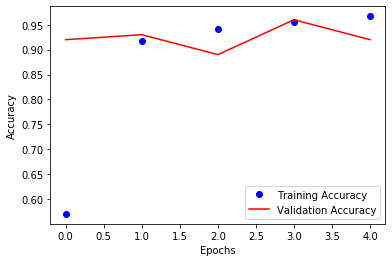

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(5) # 50 is the number of epochs
train_acc = history.history['acc']
valid_acc = history.history['val_acc']
print(train_acc)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)